In [1]:
# This notebook compares the output of SV callers in Venn and pSetR diagrams.
# It uses VCF files obtained by merging/filtering the call sets using SURVIVOR (v1.0.6).
#
# Commands:
#   SURVIVOR merge [TXT] 100 1 0 0 0 0 [VCF]
#   SURVIVOR filter [VCF] ENCFF001TDO.bed -1 -1 0 -1 [VCF]
#
# Input datasets: COLO829 and NA12878

In [2]:
library(venn)

In [3]:
library(UpSetR)

In [4]:
library(vcfR)


   *****       ***   vcfR   ***       *****
   This is vcfR 1.8.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****



In [5]:
library(tools)

In [6]:
paths<-c("NA12878/callers", "COLO829/callers", "NA12878/samples", "COLO829/samples")

In [7]:
i<-1

In [8]:
callers<-c("all", "manta", "delly", "lumpy", "gridss")

In [9]:
j<-1

In [10]:
sets<-read.table(paste(paths[i], paste0(callers[j], ".txt"), sep="/"), colClasses="character")

In [11]:
#sets<-toupper(gsub(".*\\/(\\d+)\\/.*\\/(.*)", "\\2-\\1", file_path_sans_ext(sets$V1)))
sets<-toupper(gsub(".*\\/(\\d+)\\/.*\\/(.*)", "\\2", file_path_sans_ext(sets$V1)))

In [12]:
#sets

In [13]:
nsets<-length(sets)

In [14]:
vcf<-read.vcfR(paste(paths[i], paste0(callers[j], ".vcf.gz"), sep="/"), verbose = FALSE)

In [15]:
binvec<-sapply(strsplit(sapply(strsplit(getFIX(vcf, getINFO=TRUE)[, 'INFO'], ";"),
                       function(x) {x[2]}), '='), function (x) {x[2]})

In [16]:
#binvec

In [17]:
sets_sz<-data.frame(matrix(ncol=2, nrow=nsets))

In [18]:
names(sets_sz)<-c('caller', 'n')

In [19]:
for (i in 1:nsets) {
    s<-rep('.',nsets)
    s<-paste(replace(s,i,1), collapse='')
    re<-paste('^',s,'$', sep='')
    caller<-sets[i]
    n<-length(grep(s,binvec))
    sets_sz[i,]<-c(caller, n)
    #print(paste(caller, n))
}

In [20]:
#sets_sz

In [21]:
vec<-table(sapply(binvec, function(x) {strtoi(x, base=2)}))

In [22]:
#vec

In [23]:
lst<-strsplit(binvec, '')

In [24]:
#lst

In [25]:
s<-as.character(seq(0,(2**nsets-1)))

In [26]:
#s

In [27]:
N<-sapply(s, function(x){vec[x]}, USE.NAMES=FALSE)

In [28]:
N[is.na(N)]<-0

In [29]:
#N

In [30]:
slabels<-paste0(sets_sz$caller, ' (', sets_sz$n, ')')

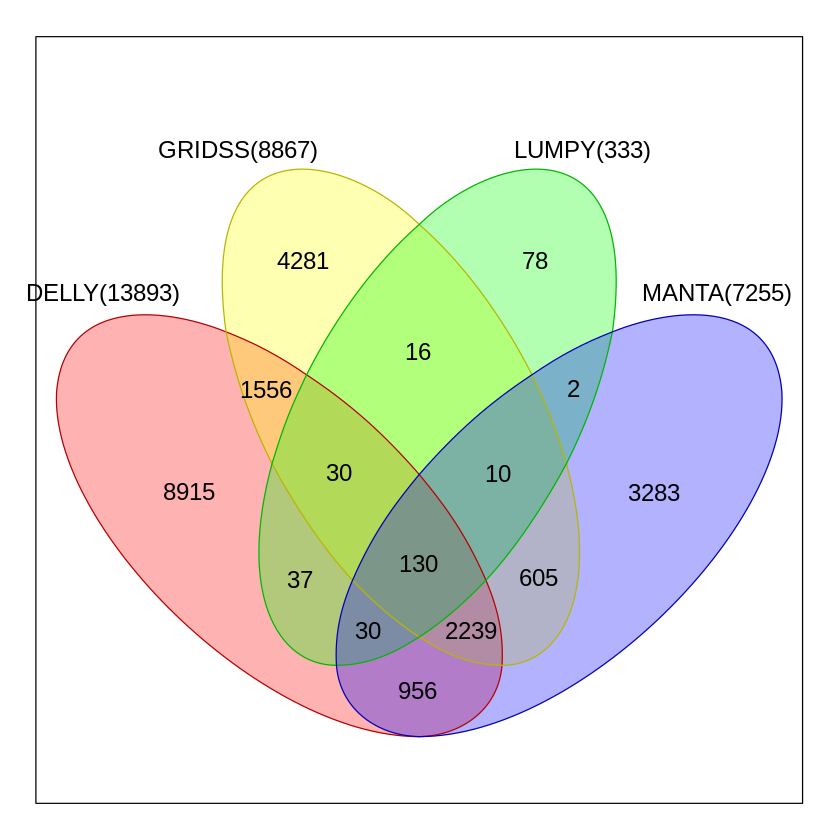

In [31]:
if (j == 1)
{
    venn(nsets, counts=N, snames=slabels, ilabels=TRUE, cexil=1.2, cexsn=1.2, zcolor="style", ellipse=TRUE)
}

In [32]:
nr<-length(lst)

In [33]:
#nr

In [34]:
nc<-length(lst[[1]])

In [35]:
#nc

In [36]:
M<-matrix(0, nrow=nr, ncol=nc)

In [37]:
for (i in 1:nr)
{
  M[i, ] <- as.integer(lst[[i]])
}

In [38]:
#M

In [39]:
sv<-data.frame(ID = getFIX(vcf)[, 'ID'], M)

In [40]:
#colnames(sv)

In [41]:
colnames(sv)[-1]<-slabels

In [42]:
#colnames(sv)

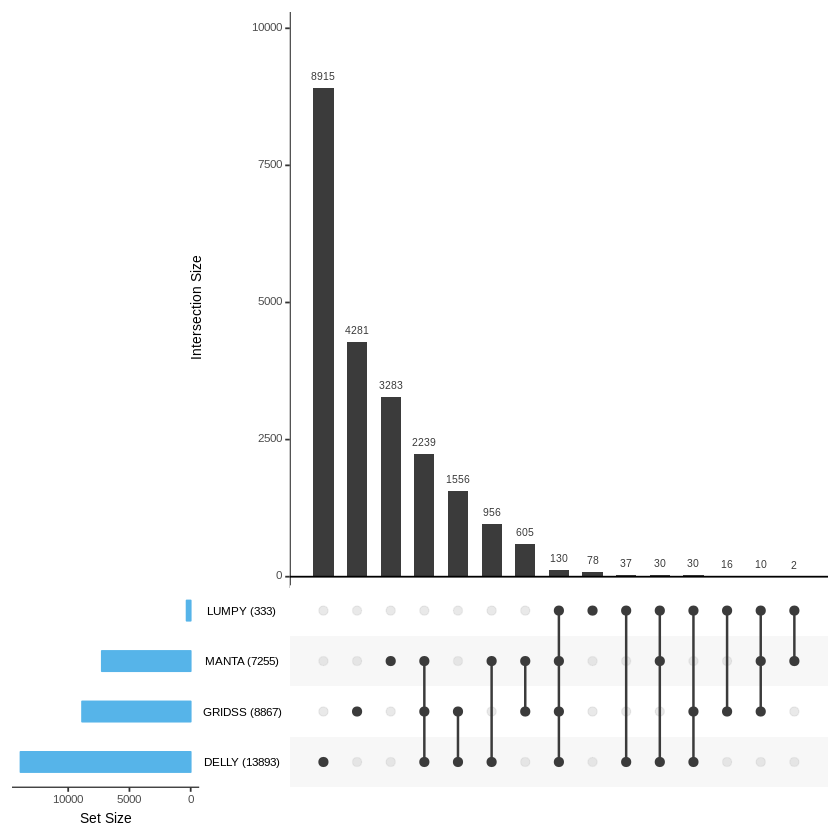

In [43]:
upset(sv, nsets=nsets, sets.bar.color="#56B4E9", order.by="freq")